In [1]:
import pandas as pd
import numpy as np
from connect_to_mysql import Database
import MySQLdb as my
from datetime import datetime

In [2]:
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter

In [3]:
orig_df = Database.query_dataframe("rides")
orig_df.head()

,db_updated_at,id,user_id,distance,number_of_passenger,price_operations,price_offer,price_payed,free_ride,payment_type,...,rating,rating_puenktlichkeit,rating_sauberkeit,rating_fahrer,rating_find_modstop,rating_other_comments,rating_question_one,rating_question_two,cancellation_reason,cancellation_comment
0,2022-05-10 18:23:06,000b1332-d68a-49ae-a5cb-4b266135e73a,2e93c9bc-9b81-48fe-82c1-3ee81eeed1ce,3298,1.0,3.82,1.67,1.67,0,VRN,...,NaN,None,None,None,None,None,None,None,None,None
1,2022-05-10 18:23:06,000ff73a-86da-483c-9332-47dfa30bd1a4,8c5545e5-72cd-4163-80bf-8d975695642f,5084,1.0,4.45,2.55,2.55,0,VRN,...,NaN,None,None,None,None,None,None,None,None,None
2,2022-05-10 18:23:06,00140023-fe13-4793-a6b0-04f98265e8e2,04d8c032-0c70-4c43-98cb-7823d95d0622,3226,1.0,3.82,3.29,0.00,0,BAHN_CARD,...,NaN,None,None,None,None,None,None,None,None,None
3,2022-05-10 18:23:06,001f5a0b-4a98-4365-aa25-2a3e13fb4fd0,76f7bb28-ae72-4d6b-83f5-ce252a641f81,2314,1.0,3.10,3.10,3.10,0,STANDARD,...,5.0,None,None,None,None,None,None,None,None,None
4,2022-05-10 18:23:06,00234489-ca62-4977-8b6f-c8c3a28f02d2,ae32dda1-7fbc-457c-8f63-95ce72afbdae,2097,1.0,2.95,1.45,1.45,0,VRN,...,NaN,None,None,None,None,None,None,None,None,None


In [4]:
orig_df.columns

Index(['db_updated_at', 'id', 'user_id', 'distance', 'number_of_passenger',
       'price_operations', 'price_offer', 'price_payed', 'free_ride',
       'payment_type', 'bahn_card_number', 'year_card_type',
       'year_card_number', 'pickup_address', 'dropoff_address', 'state',
       'created_from_offer', 'created_at', 'scheduled_to', 'dispatched_at',
       'canceled_at', 'pickup_arrival_time', 'arriving_push',
       'vehicle_arrived_at', 'earliest_pickup_expectation', 'pickup_first_eta',
       'pickup_eta', 'pickup_at', 'dropoff_first_eta', 'dropoff_eta',
       'dropoff_at', 'updated_at', 'arrival_deviation', 'waiting_time',
       'boarding_time', 'ride_time', 'trip_time', 'shortest_ridetime', 'delay',
       'longer_route_factor', 'arrival_indicator', 'rating',
       'rating_puenktlichkeit', 'rating_sauberkeit', 'rating_fahrer',
       'rating_find_modstop', 'rating_other_comments', 'rating_question_one',
       'rating_question_two', 'cancellation_reason', 'cancellation_comm

In [5]:
completed_df = orig_df[orig_df["state"]=="completed"]
# completed_df = completed_df.iloc[0:5]
completed_df


,db_updated_at,id,user_id,distance,number_of_passenger,price_operations,price_offer,price_payed,free_ride,payment_type,...,rating,rating_puenktlichkeit,rating_sauberkeit,rating_fahrer,rating_find_modstop,rating_other_comments,rating_question_one,rating_question_two,cancellation_reason,cancellation_comment
0,2022-05-10 18:23:06,000b1332-d68a-49ae-a5cb-4b266135e73a,2e93c9bc-9b81-48fe-82c1-3ee81eeed1ce,3298,1.0,3.82,1.67,1.67,0,VRN,...,NaN,None,None,None,None,None,None,None,None,None
1,2022-05-10 18:23:06,000ff73a-86da-483c-9332-47dfa30bd1a4,8c5545e5-72cd-4163-80bf-8d975695642f,5084,1.0,4.45,2.55,2.55,0,VRN,...,NaN,None,None,None,None,None,None,None,None,None
3,2022-05-10 18:23:06,001f5a0b-4a98-4365-aa25-2a3e13fb4fd0,76f7bb28-ae72-4d6b-83f5-ce252a641f81,2314,1.0,3.10,3.10,3.10,0,STANDARD,...,5.0,None,None,None,None,None,None,None,None,None
4,2022-05-10 18:23:06,00234489-ca62-4977-8b6f-c8c3a28f02d2,ae32dda1-7fbc-457c-8f63-95ce72afbdae,2097,1.0,2.95,1.45,1.45,0,VRN,...,NaN,None,None,None,None,None,None,None,None,None
5,2022-05-10 18:23:06,0035a224-6e96-4dc9-b38a-634a8f58fd66,438a88e7-4ae8-4d2e-aa81-80fcfa8babf4,2995,1.0,3.65,3.65,3.65,0,STANDARD,...,NaN,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12553,2022-05-10 18:23:06,ffd420c6-808f-4f66-bed3-00ead329b041,50ff99bf-21a6-4c1d-825b-26da7268e054,5825,2.0,9.17,9.17,9.17,0,STANDARD,...,NaN,None,None,None,None,None,None,None,None,None
12554,2022-05-10 18:23:06,ffda8cae-64e9-451c-a737-6653078957cd,da73d81a-b1a6-4332-8e91-47135feeef13,3883,1.0,3.85,3.40,0.00,0,BAHN_CARD,...,NaN,None,None,None,None,None,None,None,None,None
12555,2022-05-10 18:23:06,ffdb9576-09d7-43e3-b68e-62acaf9935bc,ebc91c58-c627-4bc7-b79d-0016d50a2fb4,6967,1.0,5.85,5.85,5.85,0,STANDARD,...,5.0,None,None,None,None,None,None,None,None,None
12556,2022-05-10 18:23:06,ffe438f3-de7f-409e-807b-48e62c11c5ed,187bc389-1f58-44e3-a50e-1a82a34b0686,5050,1.0,4.81,4.28,4.28,0,BAHN_CARD,...,NaN,None,None,None,None,None,None,None,None,None


In [6]:
eventlog_df  = pd.DataFrame(columns= ['case:concept:name','concept:name','time:timestamp'])

for index, row in completed_df.iterrows():
    # define filter attributes
    case_filter_list = ['id', 'user_id', 'distance','price_operations', 'price_offer', 'price_payed', 'free_ride','pickup_address', 'dropoff_address', 'state','created_from_offer']
    event_filter_list =['created_at', 'scheduled_to', 'dispatched_at', 'canceled_at','arriving_push','vehicle_arrived_at', 'earliest_pickup_expectation', 'pickup_first_eta','pickup_eta', 'pickup_at', 'dropoff_first_eta', 'dropoff_eta','dropoff_at', 'updated_at']
    filter_list = case_filter_list + event_filter_list

    # filter dataseries on case and event attributes
    filtered_case = row[case_filter_list]
    filtered_events = row[event_filter_list]

    # extract case id and create list in the length of the output df
    case_id = filtered_case["id"]
    case_id_list= [case_id]*len(event_filter_list)

    # fill output df with case id and transposed event attributes
    temp_output_df = pd.DataFrame({'case:concept:name': case_id_list})
    temp_output_df['concept:name'] = event_filter_list
    temp_output_df['time:timestamp'] = filtered_events.transpose().values
    
    # update output df
    eventlog_df = pd.concat([eventlog_df,temp_output_df])

eventlog_df



,case:concept:name,concept:name,time:timestamp
0,000b1332-d68a-49ae-a5cb-4b266135e73a,created_at,2022-03-22 22:17:00
1,000b1332-d68a-49ae-a5cb-4b266135e73a,scheduled_to,2022-03-22 22:50:00
2,000b1332-d68a-49ae-a5cb-4b266135e73a,dispatched_at,2022-03-22 22:42:00
3,000b1332-d68a-49ae-a5cb-4b266135e73a,canceled_at,NaT
4,000b1332-d68a-49ae-a5cb-4b266135e73a,arriving_push,2022-03-22 22:42:13
...,...,...,...
9,fff26dc8-9f37-41ef-9757-717fb1fc9090,pickup_at,2021-09-05 14:34:39
10,fff26dc8-9f37-41ef-9757-717fb1fc9090,dropoff_first_eta,2021-09-05 14:45:27
11,fff26dc8-9f37-41ef-9757-717fb1fc9090,dropoff_eta,2021-09-05 14:44:59
12,fff26dc8-9f37-41ef-9757-717fb1fc9090,dropoff_at,2021-09-05 14:43:10


In [7]:
eventlog_df = eventlog_df.sort_values(by=['case:concept:name', 'time:timestamp'], ascending=[True ,True])

# convert df to pm4py eventlog
log = log_converter.apply(eventlog_df)

In [8]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

# Use the log and discover the underlying process
i_net, i_initial_marking, i_final_marking = inductive_miner.apply(log)

C:\Users\jostm7\AppData\Local\Temp/ipykernel_17608/505518290.py:6: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(i_net, i_initial_marking, i_final_marking)


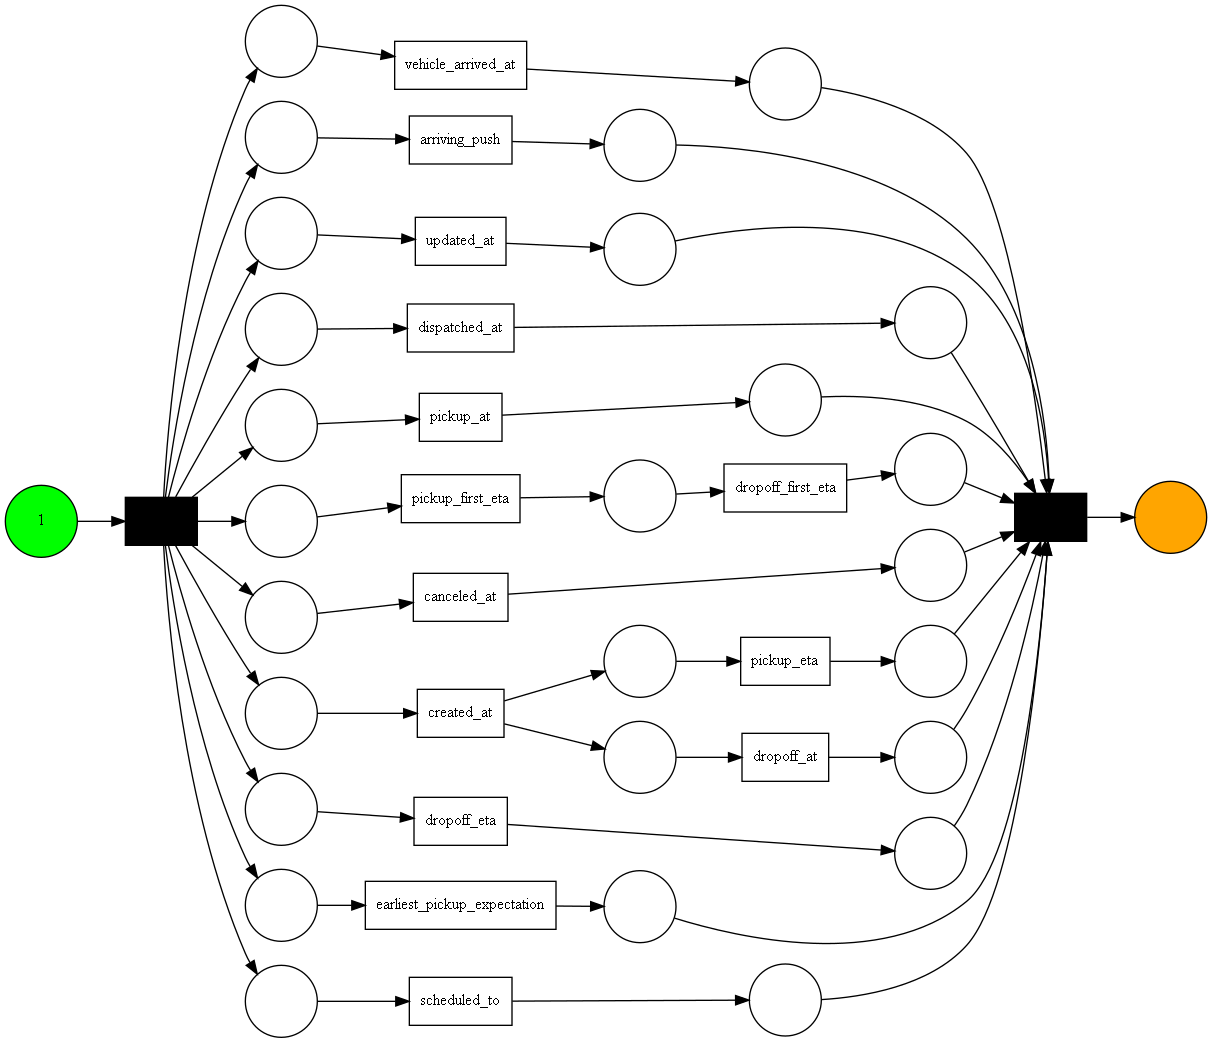

In [10]:
from pm4py.visualization.petrinet import visualizer as pn_visualizer
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

# visualize and describe the resulting process model (inductive)
gviz = pn_visualizer.apply(i_net, i_initial_marking, i_final_marking)
pn_visualizer.view(gviz)